In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.cm as cm
import os,sys
sys.path.append(os.path.realpath('FGW distance on graph/lib'))
from graph import Graph
from ot_distances import Fused_Gromov_Wasserstein_distance

%load_ext autoreload
%autoreload 2

In [3]:
from synthetic_graphs import *
from solver import *

### Generate and test our graphs

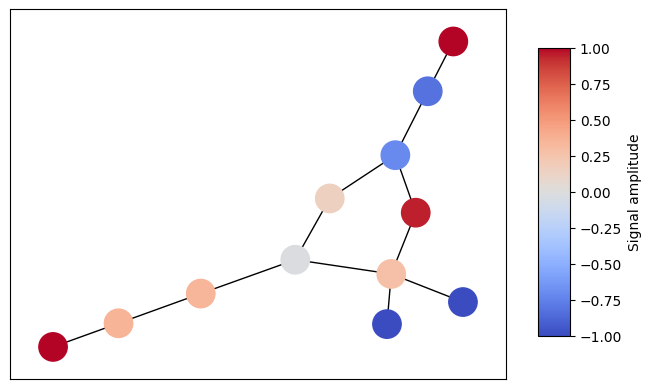

Mean and std:  (0.04399454349560548, 0.7305099844236603)
Laplacian quadratic form:  11.199427941735795


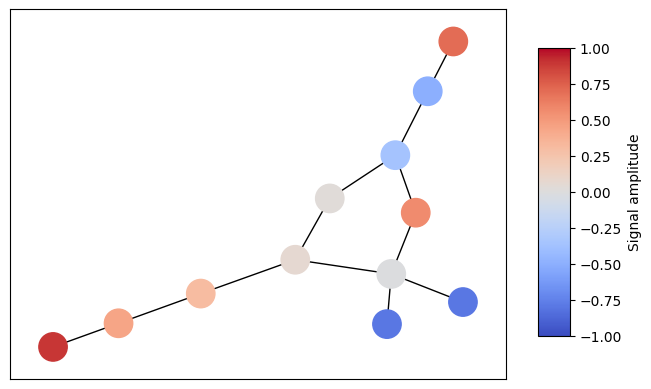

Mean and std:  (0.04399454349560555, 0.5436317291145978)
Laplacian quadratic form:  4.345684309672937


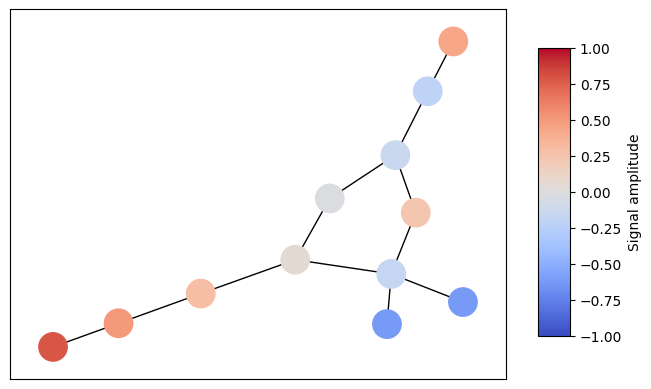

Mean and std:  (0.04399454349560563, 0.4118697572974569)
Laplacian quadratic form:  1.3762421556129754


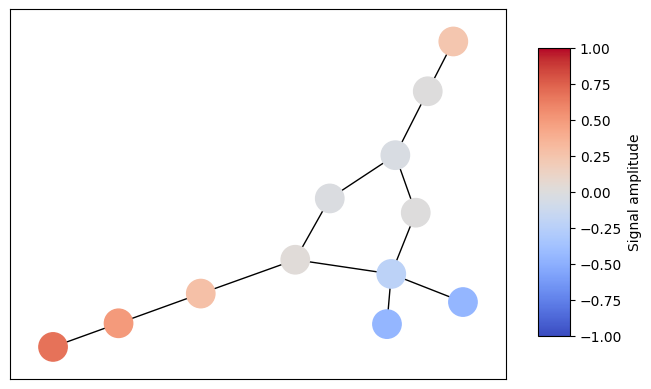

Mean and std:  (0.0439945434956057, 0.3272021998275196)
Laplacian quadratic form:  0.42517286944473015


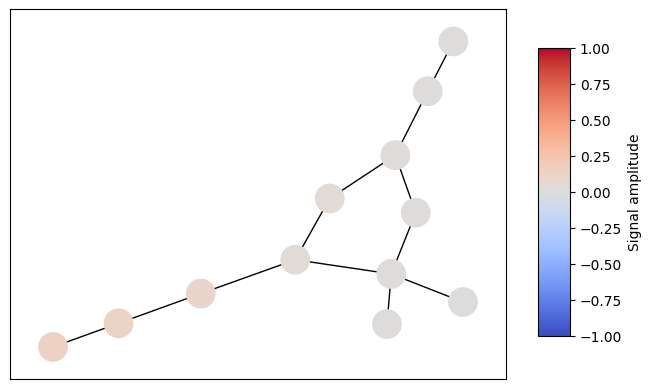

Mean and std:  (0.04399454349560569, 0.04418729098175911)
Laplacian quadratic form:  0.004519899966634894


In [4]:
# Input parameters
num_nodes = 12
num_edges = 12
value_range = (-1, 1)
diffusion_timesteps = [0, 2, 5, 10, 100]

# Create the graph
G0 = create_graph(num_nodes, num_edges, value_range, edge_weight_range = [1,1])

# Perform diffusion and plot the graph at each timestep
G_list = [G0]
for t in diffusion_timesteps:
    G = diffusion(G0,  diffusion_steps = t)
    G_list.append(G)
    plot_graph(G, labels=False, value_range=value_range)
    print("Mean and std: ", graph_stats(G))
    print("Laplacian quadratic form: ", signal_smoothness_on_graph(G))


In [5]:
#Sample the signal from the graph
samples = sample_signal_from_graph(G0, num_samples = 20, sampling_noise_std = 0.2)
print("Samples shape: ", samples.shape)
print("Samples: ", samples)

Samples shape:  (20, 12)
Samples:  [[-0.92793043 -0.90721807 -0.05033402  0.91695805 -0.90654695  0.24589967
   1.09496943  0.1341645   0.56142701 -1.2899785   0.67327691  0.90977151]
 [-0.91245042 -0.93605906  0.13414548  1.31845025 -0.51471028 -0.35077307
   1.14171514  0.06943563  0.2013586  -0.63360932  0.29112154  1.03197038]
 [-0.44794988 -1.07202214  0.27439454  0.84330705 -0.70215521  0.30933085
   1.01603423  0.34731434  0.20101652 -0.92841318  0.68011479  0.92849997]
 [-0.45497936 -0.90205486  0.08782304  0.93170135 -0.49123175 -0.13941277
   1.07711052  0.19263128  0.0697871  -0.74531363  0.26929985  0.98514944]
 [-0.52448781 -1.23289113  0.54193109  0.85946781 -0.64826109  0.00526386
   1.17133258  0.39017401  0.42549353 -1.10923232  0.69961321  1.04055775]
 [-0.89948898 -0.83576469  0.25050529  1.08982879 -1.01438851 -0.17096405
   0.6854056  -0.38582642  0.05087715 -1.12302615  0.64902847  0.97042327]
 [-0.89023392 -0.91204304 -0.06685966  1.07535819 -0.39016985 -0.103854

### Test of the initial solver

In [6]:
#Initialize graph

solvers.options['show_progress'] = True
syn = synthetic_data_gen(10)
num_nodes = syn.num_vertices

np.random.seed(3)
graph_signals_er, graph_signals_ba, graph_signals_rnd = syn.get_graph_signals()


     pcost       dcost       gap    pres   dres
 0:  1.4139e+00 -3.4579e+00  1e+02  1e+01  4e+00
 1:  4.1017e+00 -1.7894e+00  7e+00  2e-01  6e-02
 2:  4.0451e+00  2.6237e+00  2e+00  3e-02  1e-02
 3:  3.7782e+00  3.3637e+00  4e-01  2e-16  5e-16
 4:  3.6185e+00  3.5829e+00  4e-02  2e-16  3e-16
 5:  3.5971e+00  3.5956e+00  1e-03  3e-16  4e-16
 6:  3.5962e+00  3.5961e+00  7e-05  2e-16  4e-16
 7:  3.5961e+00  3.5961e+00  4e-06  2e-16  4e-16
 8:  3.5961e+00  3.5961e+00  5e-08  3e-16  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4032e+00 -3.4766e+00  1e+02  1e+01  4e+00
 1:  4.0898e+00 -1.8075e+00  7e+00  2e-01  6e-02
 2:  4.0322e+00  2.6050e+00  2e+00  3e-02  1e-02
 3:  3.7646e+00  3.3492e+00  4e-01  2e-16  4e-16
 4:  3.6042e+00  3.5684e+00  4e-02  3e-16  3e-16
 5:  3.5827e+00  3.5812e+00  1e-03  3e-16  4e-16
 6:  3.5817e+00  3.5817e+00  7e-05  3e-16  3e-16
 7:  3.5817e+00  3.5817e+00  4e-06  2e-16  3e-16
 8:  3.5817e+00  3.5817e+00  7e-08  4e-16  3e-1

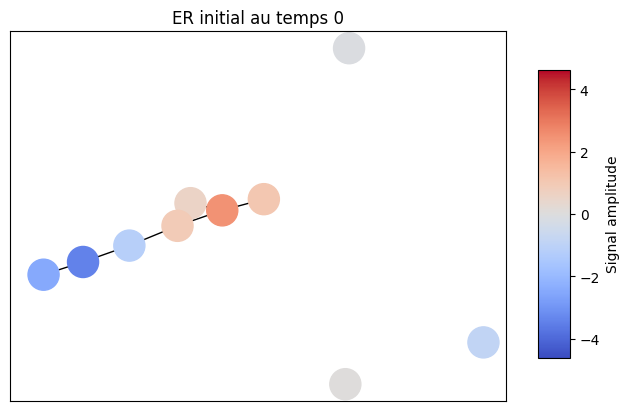

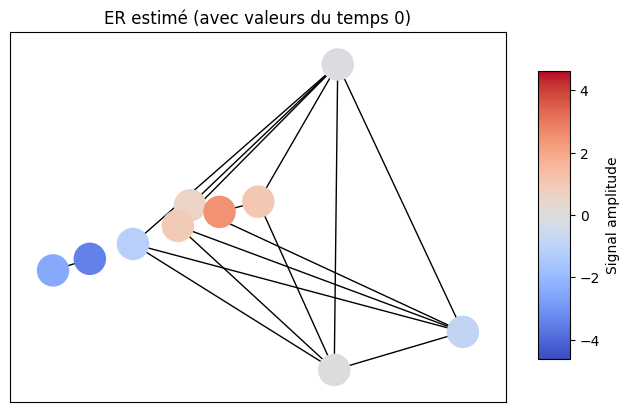

In [7]:
L_er, Y_er = gl_sig_model(graph_signals_er, 1000, syn.alpha_er, syn.beta_er)

L_er_gt = nx.laplacian_matrix(syn.er_graph)

gt_graph = syn.er_graph
est_graph = create_graph_from_laplacian(L_er)
pos = nx.spring_layout(gt_graph)
for node in gt_graph.nodes():
    gt_graph.nodes[node]['pos'] = list(pos[node])
    gt_graph.nodes[node]['value'] = graph_signals_er[0][node]
for edge in gt_graph.edges():
    gt_graph[edge[0]][edge[1]]['weight'] = 1
for node in est_graph.nodes():
    est_graph.nodes[node]['pos'] = list(pos[node])
    est_graph.nodes[node]['value'] = graph_signals_er[0][node]
for edge in est_graph.edges():
    est_graph[edge[0]][edge[1]]['weight'] = 1

plot_graph(gt_graph, [np.min(graph_signals_er), np.max(graph_signals_er)], labels=False, title="ER initial au temps 0")
plot_graph(est_graph, [np.min(graph_signals_er), np.max(graph_signals_er)], labels=False, title="ER estimé (avec valeurs du temps 0)")

     pcost       dcost       gap    pres   dres
 0: -6.4116e-01 -4.3846e+00  1e+02  1e+01  4e+00
 1:  4.2525e+00 -2.7333e+00  7e+00  2e-15  1e-15
 2:  3.9462e+00  1.8086e+00  2e+00  7e-16  6e-16
 3:  3.5958e+00  2.2380e+00  1e+00  5e-16  3e-16
 4:  3.2817e+00  3.0207e+00  3e-01  3e-16  4e-16
 5:  3.1862e+00  3.1587e+00  3e-02  3e-16  4e-16
 6:  3.1712e+00  3.1700e+00  1e-03  5e-16  3e-16
 7:  3.1705e+00  3.1704e+00  4e-05  5e-16  3e-16
 8:  3.1705e+00  3.1705e+00  6e-07  4e-16  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.5388e-01 -4.4039e+00  1e+02  1e+01  4e+00
 1:  4.2389e+00 -2.7510e+00  7e+00  2e-15  1e-15
 2:  3.9316e+00  1.7901e+00  2e+00  9e-16  6e-16
 3:  3.5793e+00  2.2235e+00  1e+00  4e-16  4e-16
 4:  3.2648e+00  3.0036e+00  3e-01  4e-16  4e-16
 5:  3.1691e+00  3.1413e+00  3e-02  1e-16  4e-16
 6:  3.1539e+00  3.1527e+00  1e-03  3e-16  3e-16
 7:  3.1532e+00  3.1532e+00  4e-05  1e-16  4e-16
 8:  3.1532e+00  3.1532e+00  6e-07  3e-16  3e-1

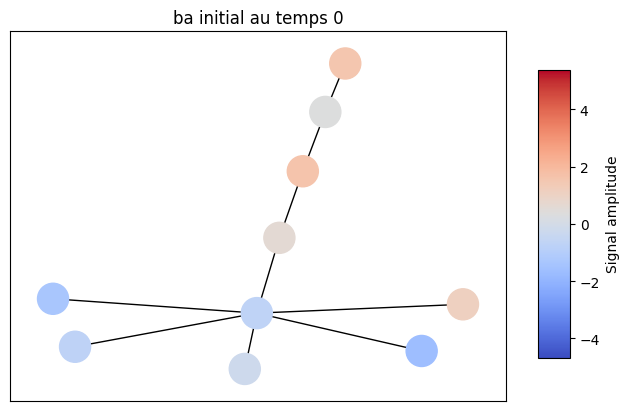

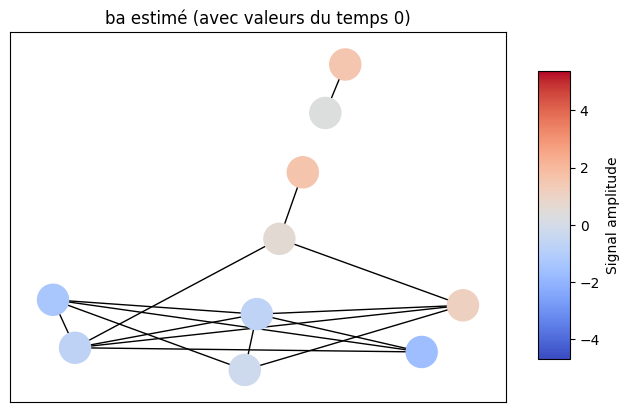

In [8]:
L_ba, Y_ba = gl_sig_model(graph_signals_ba, 1000, syn.alpha_ba, syn.beta_ba)

L_ba_gt = nx.laplacian_matrix(syn.ba_graph)

gt_graph = syn.ba_graph
est_graph = create_graph_from_laplacian(L_ba)
pos = nx.spring_layout(gt_graph)
for node in gt_graph.nodes():
    gt_graph.nodes[node]['pos'] = list(pos[node])
    gt_graph.nodes[node]['value'] = graph_signals_ba[0][node]
for edge in gt_graph.edges():
    gt_graph[edge[0]][edge[1]]['weight'] = 1
for node in est_graph.nodes():
    est_graph.nodes[node]['pos'] = list(pos[node])
    est_graph.nodes[node]['value'] = graph_signals_ba[0][node]
for edge in est_graph.edges():
    est_graph[edge[0]][edge[1]]['weight'] = 1

plot_graph(gt_graph, [np.min(graph_signals_ba), np.max(graph_signals_ba)], labels=False, title="ba initial au temps 0")
plot_graph(est_graph, [np.min(graph_signals_ba), np.max(graph_signals_ba)], labels=False, title="ba estimé (avec valeurs du temps 0)")

     pcost       dcost       gap    pres   dres
 0:  2.1152e+01  1.5303e+01  7e+01  7e+00  2e+00
 1:  2.1417e+01  1.6755e+01  7e+00  3e-01  6e-02
 2:  2.1429e+01  2.0760e+01  7e-01  2e-02  4e-03
 3:  2.1324e+01  2.1264e+01  6e-02  8e-04  2e-04
 4:  2.1303e+01  2.1299e+01  4e-03  2e-05  4e-06
 5:  2.1301e+01  2.1301e+01  2e-04  2e-07  5e-08
 6:  2.1301e+01  2.1301e+01  4e-06  2e-09  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.0872e+01  1.5019e+01  7e+01  7e+00  2e+00
 1:  2.1136e+01  1.6472e+01  6e+00  2e-01  6e-02
 2:  2.1144e+01  2.0479e+01  7e-01  2e-02  4e-03
 3:  2.1040e+01  2.0979e+01  6e-02  9e-04  2e-04
 4:  2.1019e+01  2.1014e+01  4e-03  2e-05  4e-06
 5:  2.1016e+01  2.1016e+01  2e-04  2e-07  5e-08
 6:  2.1016e+01  2.1016e+01  5e-06  2e-09  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.0872e+01  1.5018e+01  7e+01  7e+00  2e+00
 1:  2.1136e+01  1.6471e+01  6e+00  2e-01  6e-02
 2:  2.1144e+01  2.0478e

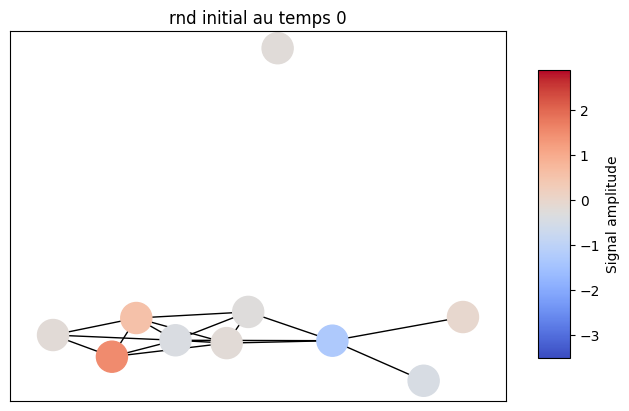

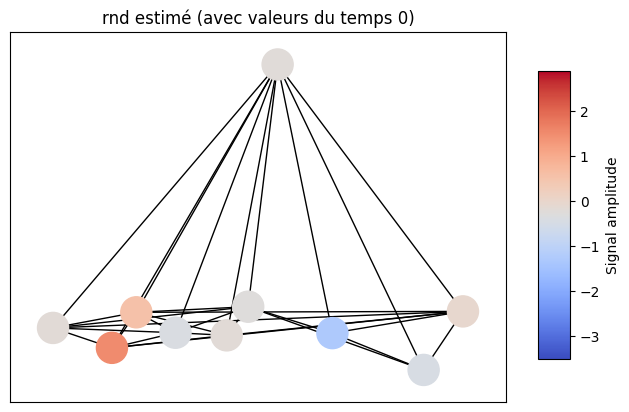

In [9]:
L_rnd, Y_rnd = gl_sig_model(graph_signals_rnd, 1000, syn.alpha_rnd, syn.beta_rnd)

L_rnd_gt = nx.laplacian_matrix(syn.random_graph)

gt_graph = syn.random_graph
est_graph = create_graph_from_laplacian(L_rnd)
pos = nx.spring_layout(gt_graph)
for node in gt_graph.nodes():
    gt_graph.nodes[node]['pos'] = list(pos[node])
    gt_graph.nodes[node]['value'] = graph_signals_rnd[0][node]
for edge in gt_graph.edges():
    gt_graph[edge[0]][edge[1]]['weight'] = 1
for node in est_graph.nodes():
    est_graph.nodes[node]['pos'] = list(pos[node])
    est_graph.nodes[node]['value'] = graph_signals_rnd[0][node]
for edge in est_graph.edges():
    est_graph[edge[0]][edge[1]]['weight'] = 1

plot_graph(gt_graph, [np.min(graph_signals_rnd), np.max(graph_signals_rnd)], labels=False, title="rnd initial au temps 0")
plot_graph(est_graph, [np.min(graph_signals_rnd), np.max(graph_signals_rnd)], labels=False, title="rnd estimé (avec valeurs du temps 0)")

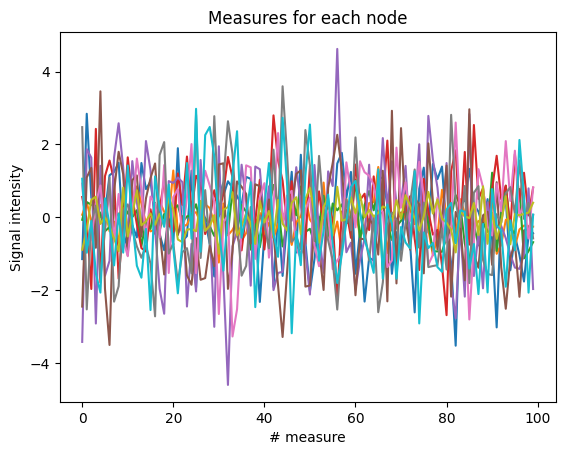

In [10]:
# Plot the 100 measures on each node
plt.figure()
for node in range(graph_signals_er.shape[1]) :
    plt.plot(graph_signals_er[:, node], label = f"Signal du noeud {node}")
# plt.legend()
plt.title("Measures for each node")
plt.xlabel("# measure")
plt.ylabel("Signal intensity")
plt.show()

### Test solver with our graphs

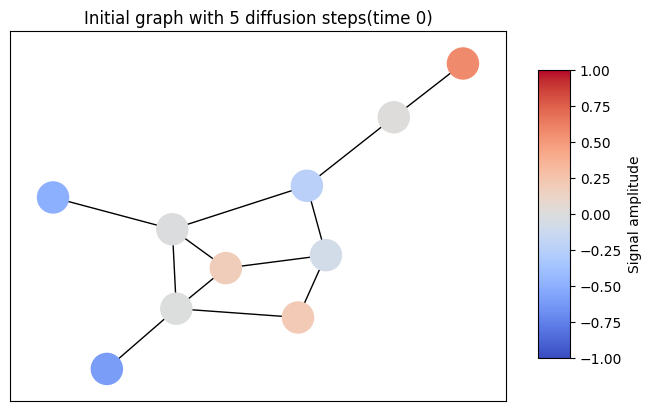

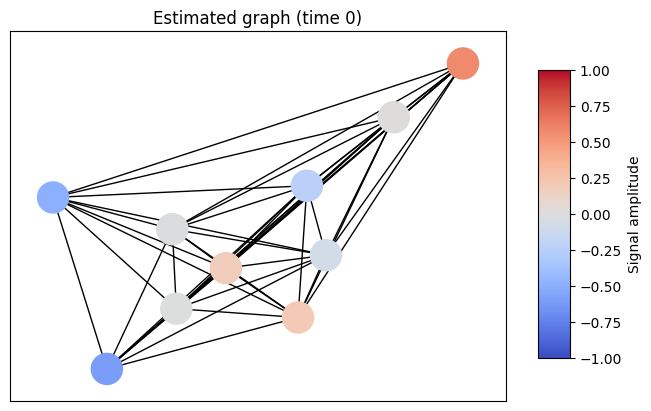

In [11]:
# Graph generation
# Input parameters
num_nodes = 10
num_edges = 12
value_range = (-1, 1)
diffusion_time = 5
# Create the initial graph
G0 = create_graph(num_nodes, num_edges, value_range, edge_weight_range = [1,1])
# Perform diffusion
G = diffusion(G0,  diffusion_steps = diffusion_time)

# Graph signal generation
# Signal parameters
num_samples = 20
noise_std = 0.2
# Generation
graph_signal = sample_signal_from_graph(G, num_samples, noise_std)

# Solver
# Solver parameters
max_iter = 1000
alpha = 1e-3
beta = 1e-1
solvers.options['show_progress'] = False
np.random.seed(3)
# Solving
L_est, Y_est = gl_sig_model(graph_signal, max_iter, alpha, beta)

# Generate graph from Laplacian
G_est = create_graph_from_laplacian(L_est, node_start = 1)
for node in G_est.nodes():
    G_est.nodes[node]['value'] = G.nodes[node]['value'] #add signal
    G_est.nodes[node]['pos'] = G.nodes[node]['pos'] #keep same position as initial
for edge in G_est.edges():
    G_est[edge[0]][edge[1]]['weight'] = 1 #Add weight of 1 (not etsimated)

plot_graph(G, value_range=value_range, labels=False, title=f"Initial graph with {diffusion_time} diffusion steps(time 0)")
plot_graph(G_est, value_range=value_range, labels=False, title="Estimated graph (time 0)")

### Tuning hyperparameters

Principe : On choisit alpha, beta et un t_diff. On génére n_stat graphes initiaux, on les fait diffuser et on crée un sample pour chacune des diffusions.
On utilise le solver et on fait la moyenne sur les n_stat graphe des distances.

In [205]:
# REMARQUE : Cette cellule prend un peu moins de 5min pour n_stat de 10 chez moi

n_stat = 10
g_init = []
sample_init = []
for _ in range(n_stat) :
    # Graph generation
    # Input parameters
    num_nodes = 10
    num_edges = 12
    value_range = (-1, 1)
    diffusion_time = 10
    # Create the initial graph
    G0 = create_graph(num_nodes, num_edges, value_range, edge_weight_range = [1,1])
    # Perform diffusion
    G = diffusion(G0,  diffusion_steps = diffusion_time)

    # Graph signal generation
    # Signal parameters
    num_samples = 20
    noise_std = 0.2
    # Generation
    graph_signal = sample_signal_from_graph(G, num_samples, noise_std)

    g_init.append(G)
    sample_init.append(graph_signal)

alphas = np.linspace(1e-6, 1e-3, 30)
betas = np.linspace(0.5e-4, 1e-2, 30)
G_est_ab = [[0] * len(betas) for _ in range(len(alphas))]
distances = np.zeros((len(alphas), len(betas)))
distance_min = 100
param_min = []
for i, alpha in enumerate(alphas) :
    for j, beta in enumerate(betas) :
        # Solver parameters
        max_iter = 1000
        solvers.options['show_progress'] = False
        np.random.seed(3)
        dist_k = []
        for k in range(n_stat) :
            # Solving
            L_est, Y_est = gl_sig_model(sample_init[k], max_iter, alpha, beta)

            # Generate graph from Laplacian
            G_est = create_graph_from_laplacian(L_est, node_start = 1)
            # for node in G_est.nodes():
            #     G_est.nodes[node]['value'] = g_init[k].nodes[node]['value'] #add signal
            #     G_est.nodes[node]['pos'] = g_init[k].nodes[node]['pos'] #keep same position as initial
            # for edge in G_est.edges():
            #     G_est[edge[0]][edge[1]]['weight'] = 1 #Add weight of 1 (not etsimated)
            # G_est_ab[i][j] = G_est
            dist_k.append(Fused_Gromov_Wasserstein_distance(alpha=0.5,features_metric='dirac',method='shortest_path').graph_d(Graph(g_init[k]), Graph(G_est)))
        
        distances[i, j] = sum(dist_k) / len(dist_k)
        if distances[i,j] < distance_min :
            distance_min = distances[i,j]
            param_min = [(i, alpha), (j, beta)]


[(28, 0.0009655517241379311), (3, 0.0010793103448275862)]


<Figure size 640x480 with 0 Axes>

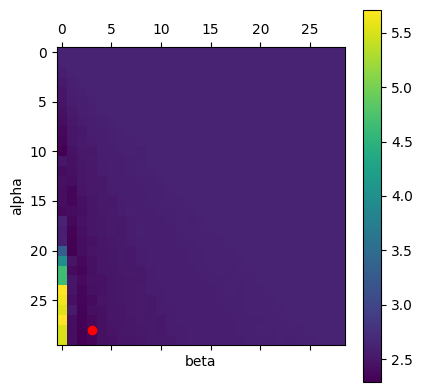

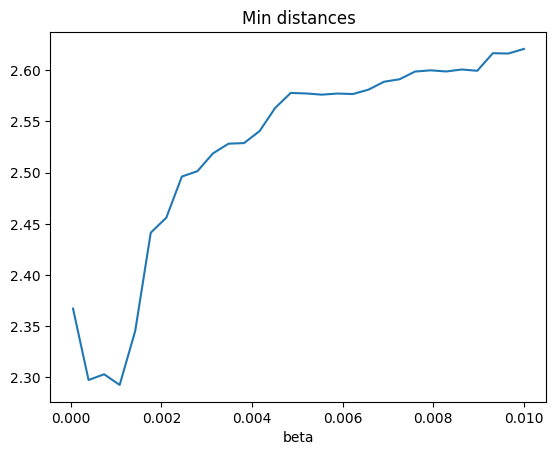

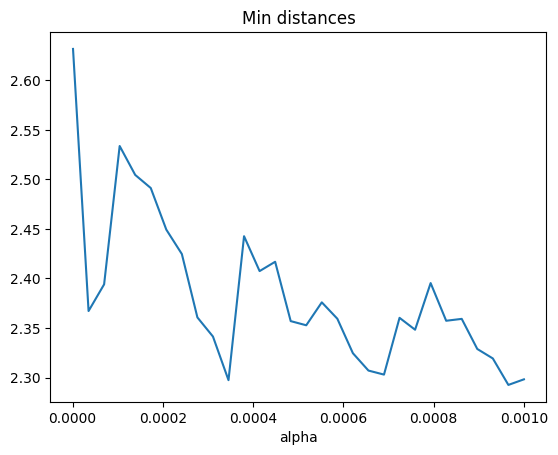

array([[  2.63169228,   2.63194813,   2.63191011,   2.63197299,
          2.63197338,   2.63198473,   2.63198754,   2.63199388,
          2.63198713,   2.63199066,   2.63198241,   2.63198158,
          2.63199623,   2.63199123,   2.63199704,   2.63199655,
          2.63199863,   2.63199417,   2.63199184,   2.63199354,
          2.63199137,   2.63199925,   2.63199443,   2.63199567,
          2.63199675,   2.63199546,   2.63199494,   2.63199737,
          2.63199624,   2.63199694],
       [  2.36710378,   2.6238414 ,   2.63597274,   2.63335398,
          2.632965  ,   2.63146371,   2.63114159,   2.63090125,
          2.63168746,   2.63143985,   2.63173546,   2.63134606,
          2.6315288 ,   2.63151695,   2.63185058,   2.63177589,
          2.63171775,   2.63181564,   2.63167719,   2.63186569,
          2.63189331,   2.6319068 ,   2.63180524,   2.63183261,
          2.63172691,   2.6318959 ,   2.63181458,   2.63186339,
          2.63180729,   2.63182085],
       [  2.39403623,   2.5795

In [206]:
print(param_min)
plt.figure()
plt.matshow(distances[:, 1:])
plt.plot(param_min[1][0], param_min[0][0], 'ro')
plt.colorbar()
plt.xlabel('beta')
plt.ylabel('alpha')
plt.show()
plt.figure()
plt.plot(betas, np.min(distances, 0))
plt.title("Min distances")
plt.xlabel("beta")
plt.show()
plt.figure()
plt.plot(alphas, np.min(distances, 1))
plt.title("Min distances")
plt.xlabel("alpha")
plt.show()
distances

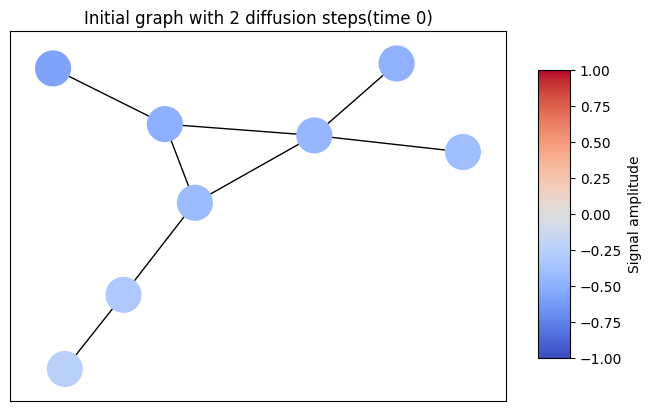

IndexError: list index out of range

In [204]:
plot_graph(G, value_range=value_range, labels=False, title=f"Initial graph with {diffusion_time} diffusion steps(time 0)")
plot_graph(param_min[2], value_range=value_range, labels=False, title=f"Estimated graph distance={distance_min}")

Best values are depending on the initial graph, but the variations are globally always the same.
The best value intervals in term of *Fused_Gromov_Wasserstein_distance(alpha=0.5,features_metric='dirac',method='shortest_path')* seem to be :
$$\alpha^* \in [6e-4, 1e-3]$$
$$\beta^* \in [1e-3, 2e-3]$$


### Distance wrt smoothness experiment

In [207]:
max_iter = 1000
alpha = 1e-3 #5e-3
beta = 2e-3
solvers.options['show_progress'] = False
np.random.seed(3)

nb_graphs = 10  # Number of graphs to generate and test on
num_nodes = 8  # Number of nodes in each graph
num_edges = 8  # Number of edges in each graph
node_value_range = [-1, 1]  # Range of values that each node can take
edge_weight_range = [1, 1]  # Range of weights that each edge can take

diffusion_steps = np.logspace(0, 1.5, 25)  # Number of diffusion steps to test on

# Build the ground truth and reconstructed graphs for each diffusion step
gt_graphs = [[] for _ in range(len(diffusion_steps))]
reconstructed_graphs = [[] for _ in range(len(diffusion_steps))] # for eah diffusion time, the estimated graph for different initial graphs
for i in range(nb_graphs):
    # Create a graph
    G0 = create_graph(num_nodes, num_edges, node_value_range, edge_weight_range = edge_weight_range)

    # Perform diffusion and plot the graph at each timestep
    for j, t in enumerate(diffusion_steps):
        G = diffusion(G0,  diffusion_steps = t)
        gt_graphs[j].append(G)

        #Sample the signal from the graph
        samples = sample_signal_from_graph(G, num_samples = 20, sampling_noise_std = 0.2)
        
        #Reconstruct the graph from the samples
        L_est, Y_est = gl_sig_model(samples, max_iter, alpha, beta)

        # Generate graph from Laplacian
        G_est = create_graph_from_laplacian(L_est, node_start = 1)
        for node in G_est.nodes():
            G_est.nodes[node]['value'] = G.nodes[node]['value'] #add signal
            G_est.nodes[node]['pos'] = G.nodes[node]['pos'] #keep same position as initial
        for edge in G_est.edges():
            G_est[edge[0]][edge[1]]['weight'] = 1 #Add weight of 1 (not etsimated)

        reconstructed_graphs[j].append(G_est)


In [208]:
#Compute the distances between the ground truth and reconstructed graphs using Fused Gromov-Wasserstein distance
distances = np.zeros((len(diffusion_steps), nb_graphs))
for i in range(len(diffusion_steps)):
    for j in range(nb_graphs):
        distances[i, j] = Fused_Gromov_Wasserstein_distance(alpha=0.5,features_metric='dirac',method='shortest_path').graph_d(Graph(gt_graphs[i][j]), Graph(reconstructed_graphs[i][j]))


# Compute the smoothness of the signal on each graph
smoothnesses = np.zeros((len(diffusion_steps), nb_graphs))
for i, graphs in enumerate(gt_graphs):
    for j, graph in enumerate(graphs):
        smoothnesses[i, j] = signal_smoothness_on_graph(graph)



Text(0.5, 1.0, 'Smoothness of the signal on a graph\nw.r.t. the diffusion steps')

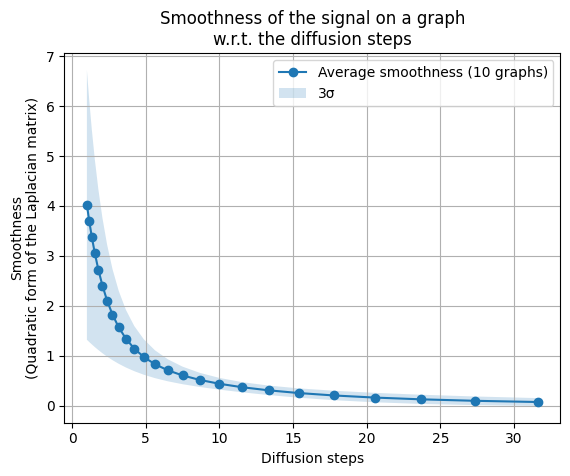

In [209]:
#Plot the average and std for the quadratic form of the Laplacian matrix of each graph per diffusion step as a continuous line and a shaded area respectively
plt.plot(diffusion_steps, np.mean(smoothnesses, axis=1), marker='o', label=f'Average smoothness ({nb_graphs} graphs)')
plt.fill_between(diffusion_steps, np.mean(smoothnesses, axis=1) - 1.5 * np.std(smoothnesses, axis=1), np.mean(smoothnesses, axis=1) + 1.5 * np.std(smoothnesses, axis=1), alpha=0.2, label='3σ')
#Add a legend to explain the shaded area
plt.legend()
plt.xlabel("Diffusion steps")
plt.ylabel("Smoothness\n(Quadratic form of the Laplacian matrix)")
#Add a grid to the plot
plt.grid()
plt.title("Smoothness of the signal on a graph\nw.r.t. the diffusion steps")



Text(0.5, 1.0, 'Distance between the ground truth and reconstructed graphs\nw.r.t. the smoothness of the signal on the graph')

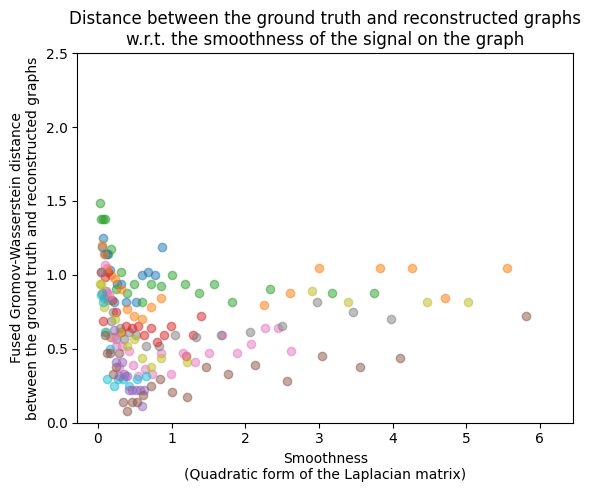

In [211]:
# Scatter plot the distance between the ground truth and reconstructed graphs per smoothness for each pair of graphs
for i in range(len(diffusion_steps)):
    for j in range(nb_graphs):
        plt.scatter(smoothnesses[i, j], distances[i, j], alpha=0.5)
plt.ylim(0, 2.5)
plt.xlabel("Smoothness\n(Quadratic form of the Laplacian matrix)")
plt.ylabel("Fused Gromov-Wasserstein distance\nbetween the ground truth and reconstructed graphs")
plt.title("Distance between the ground truth and reconstructed graphs\nw.r.t. the smoothness of the signal on the graph")

Smoothness : 1.4952109646664624, distance 0.7812500000014064


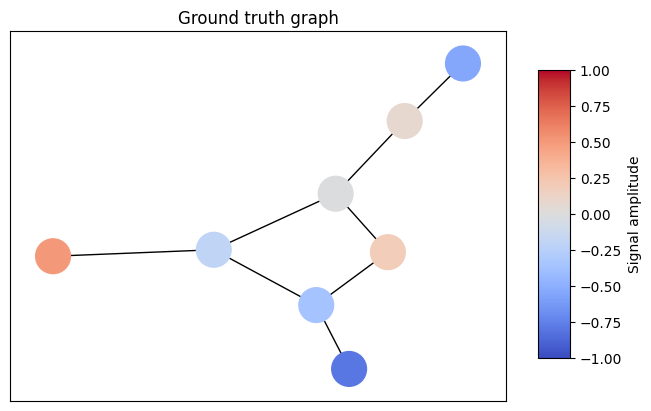

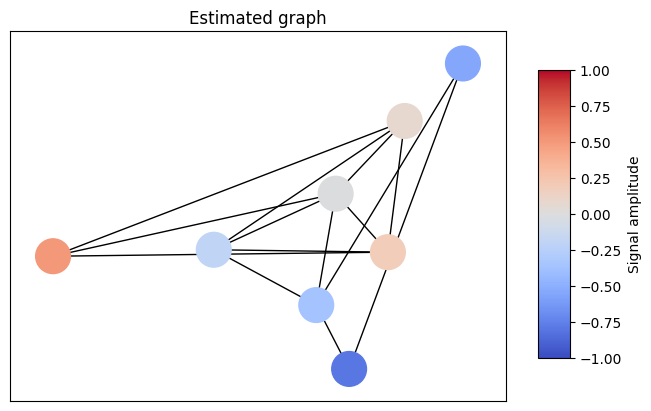

In [190]:
i=10
j=1
print(f"Smoothness : {smoothnesses[i][j]}, distance {distances[i][j]}")
plot_graph(gt_graphs[i][j], value_range=value_range, labels=False, title=f"Ground truth graph")
plot_graph(reconstructed_graphs[i][j], value_range=value_range, labels=False, title="Estimated graph")